In [1]:
import scanpy as sc
import numpy as np
import random
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)

age = "P38"
rearing = "NR"

adata = {"Glut" : [], "GABA" : [], "Non" : []}

adata["Glut"] = sc.read_h5ad("E:/Transcriptomics_V1/Mouse/{0}{1}/{0}_glut.h5ad".format(age, rearing))
adata["GABA"] = sc.read_h5ad("E:/Transcriptomics_V1/Mouse/{0}{1}/{0}_gaba.h5ad".format(age, rearing))
adata["Non"] = sc.read_h5ad("E:/Transcriptomics_V1/Mouse/{0}{1}/{0}_non.h5ad".format(age, rearing))

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


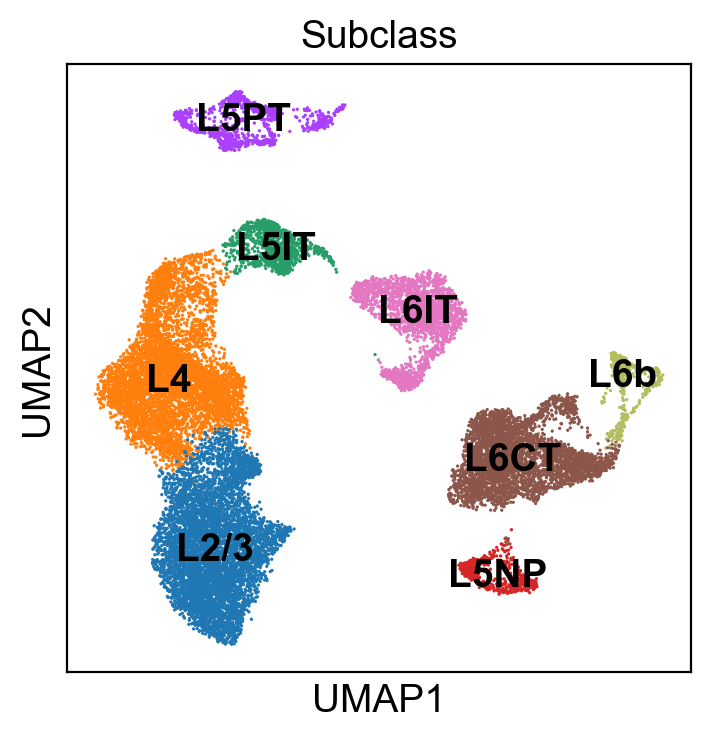

sample  Subclass
P14_1a  L2/3        1875
        L4          1718
        L5IT         303
        L5NP         160
        L5PT         245
        L6CT        1107
        L6IT         649
        L6b          117
P14_1b  L2/3        1812
        L4          1664
        L5IT         296
        L5NP         159
        L5PT         277
        L6CT        1238
        L6IT         605
        L6b          121
P14_2a  L2/3        1364
        L4          1264
        L5IT         242
        L5NP          94
        L5PT         213
        L6CT         784
        L6IT         445
        L6b          110
P14_2b  L2/3        1196
        L4          1264
        L5IT         212
        L5NP         109
        L5PT         243
        L6CT         825
        L6IT         424
        L6b           85
dtype: int64

In [2]:
sc.pl.umap(adata["Glut"], color=["Subclass"], legend_loc="on data")
adata["Glut"].obs.groupby(["sample", "Subclass"]).size()

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


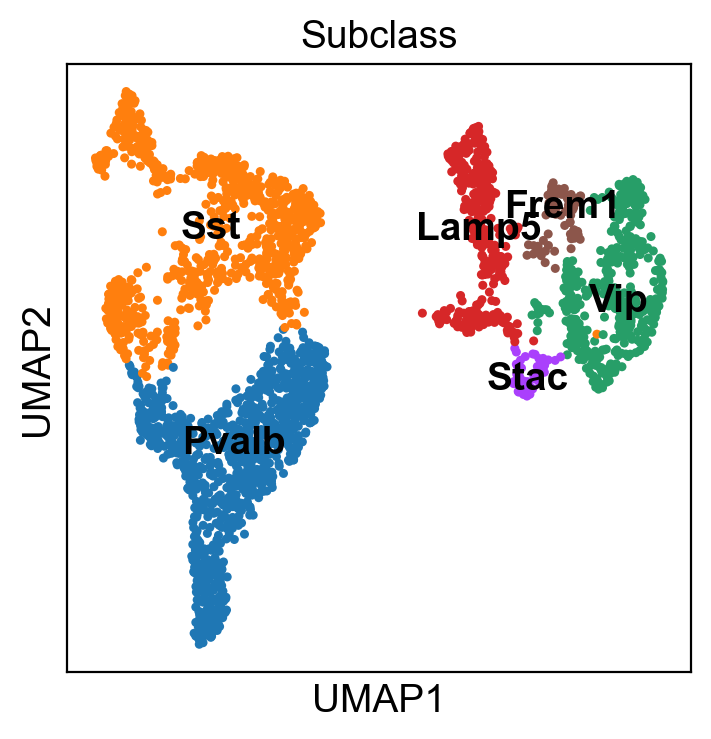

sample  Subclass
P14_1a  Pvalb       275
        Sst         258
        Vip         139
        Lamp5        91
        Stac         23
        Frem1        25
P14_1b  Pvalb       306
        Sst         253
        Vip         137
        Lamp5       105
        Stac         21
        Frem1        25
P14_2a  Pvalb       242
        Sst         161
        Vip         103
        Lamp5        89
        Stac         18
        Frem1        20
P14_2b  Pvalb       194
        Sst         174
        Vip          96
        Lamp5        64
        Stac         11
        Frem1        14
dtype: int64

In [3]:
sc.pl.umap(adata["GABA"], color=["Subclass"], legend_loc="on data")
adata["GABA"].obs.groupby(["sample", "Subclass"]).size()

In [4]:
import pandas as pd
counts_raw = pd.read_csv("E:/Transcriptomics_V1/Mouse/{0}{1}/GSE190940_{0}{1}.csv".format(age, rearing))
counts = counts_raw.copy()
counts.index = np.array(counts_raw["Unnamed: 0"])
counts = counts[counts.columns[1:]]

In [ ]:
from scipy.sparse import csc_matrix
from scipy.io import mmwrite
import gzip
import shutil

def compress_file(input_filename, output_filename):
    with open(input_filename, 'rb') as f_in:
        with gzip.open(output_filename, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

for classname in ["Glut", "GABA", "Non"]: # 
    adata_class = adata[classname]
    for sample in np.unique(adata_class.obs["sample"]):
        temp_adata = adata_class[adata_class.obs["sample"] == sample, :].copy()
        path = "E:/Transcriptomics_V1/Mouse/{0}{1}/filtered_feature_bc_matrix_{2}/".format(age, rearing, classname.lower()) + sample + "/"
        print(temp_adata)
        # bcs = [bc.replace("-P8_glut-0-0", "") for bc in temp_adata.obs.index.to_list()]
        bcs = [bc[:29] for bc in temp_adata.obs.index.to_list()]
        gns = temp_adata.var.index.to_list()
        X = counts.loc[bcs][gns]
        mmwrite(path + "matrix.mtx", csc_matrix(X.values, dtype=np.int64).T, precision=1)
        X.columns.to_frame().to_csv(path + "features.tsv", index=False, header=False)
        X.index.to_frame().to_csv(path + "barcodes.tsv", index=False, header=False)
        temp_adata.obs[["Subclass"]].to_csv(path + "subclass.csv", index=False, header=False)
        temp_adata.obs[["Type"]].to_csv(path + "type.csv", index=False, header=False)
        for fl in ["matrix.mtx", "features.tsv", "barcodes.tsv"]:
            compress_file(path + fl, path + fl + ".gz")